#Importing the necessary libraries

In [3]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt



#Loading in the training and test Data via the read_csv function imported from pandas library


In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Visualising the data that is present in train variable


#Creating the table for test and train datasets describing the mean and variance and number of samples

In [5]:
# Feature dimension
train_dim = train.shape[1]  # Number of columns/features in training data
test_dim = test.shape[1]    # Number of columns/features in testing data

# Number of samples
num_train_samples = train.shape[0]  # Number of rows/samples in training data
num_test_samples = test.shape[0]    # Number of rows/samples in testing data

# Mean and variance of the values in each attribute
train_stats = train.describe().loc[['mean', 'std']]  # DataFrame containing mean and variance for each column in training data
test_stats = test.describe().loc[['mean', 'std']]    # DataFrame containing mean and variance for each column in testing data

# Creating a summary table
summary_table = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Feature Dimension': [train_dim, test_dim],
    'Number of Samples': [num_train_samples, num_test_samples]
})

# Display summary table
print(summary_table)

# Display train_stats and test_stats
print("\nTraining Data Stats:\n", train_stats)
print("\nTesting Data Stats:\n", test_stats)

# Save the summary_table to an Excel file
summary_table.to_excel('/content/summary_table.xlsx', index=False)

# Save all tables to different sheets in the same Excel file
with pd.ExcelWriter('/content/all_tables.xlsx') as writer:
    summary_table.to_excel(writer, sheet_name='Summary', index=False)
    train_stats.to_excel(writer, sheet_name='Train_Stats')
    test_stats.to_excel(writer, sheet_name='Test_Stats')


    Dataset  Feature Dimension  Number of Samples
0  Training                  6               1000
1   Testing                  5                259

Training Data Stats:
               Id  OverallQual    GrLivArea  GarageArea      SalePrice
mean  500.500000     6.125000  1510.493000  473.350000  182284.451000
std   288.819436     1.383217   512.296179  208.901597   80291.215207

Testing Data Stats:
                Id  OverallQual    GrLivArea  GarageArea
mean  1331.000000     6.081081  1548.030888  475.467181
std     74.911058     1.379947   560.911287  219.228602


#One-hot-encoding the data in train

Encoding the categorical variables for processing and dropping the Id column since it is not a necessary information for the model

In [6]:
train = pd.get_dummies(train.drop("Id", axis =1))


#Creating the x and y axis for the data

In [7]:
x_data = train.drop("SalePrice", axis = 1)
y_data = train["SalePrice"]

checking the viability of the data via visualising it in a table

In [8]:
x_data

,OverallQual,GrLivArea,GarageArea,BldgType_1Fam,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI
0,7,1710,548,1,0,0,0,0
1,6,1262,460,1,0,0,0,0
2,7,1786,608,1,0,0,0,0
3,7,1717,642,1,0,0,0,0
4,8,2198,836,1,0,0,0,0
...,...,...,...,...,...,...,...,...
995,4,1230,305,1,0,0,0,0
996,5,1050,368,1,0,0,0,0
997,6,1442,615,1,0,0,0,0
998,3,1077,210,1,0,0,0,0


In [9]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.1,
                                                    random_state=42) # set random state for reproducible splits

In [10]:
x_train.head()

,OverallQual,GrLivArea,GarageArea,BldgType_1Fam,BldgType_2FmCon,BldgType_Duplx,BldgType_TwnhsE,BldgType_TwnhsI
716,7,2554,704,1,0,0,0,0
351,7,1453,445,1,0,0,0,0
936,7,1200,555,1,0,0,0,0
256,6,1728,673,1,0,0,0,0
635,6,3395,0,0,1,0,0,0


# Visualising the correlation between the SalesPrice and the input information for the data

In [11]:
correlation_matrix = train.corr()
print(correlation_matrix['SalePrice'].sort_values(ascending=False))


SalePrice          1.000000
OverallQual        0.797666
GrLivArea          0.734997
GarageArea         0.647953
BldgType_1Fam      0.141148
BldgType_TwnhsE    0.007639
BldgType_2FmCon   -0.100719
BldgType_TwnhsI   -0.106897
BldgType_Duplx    -0.113322
Name: SalePrice, dtype: float64


# Creating the scaled data to occupy values from 0-1

This usually improves the performance of the model, making its predictions way better

In [12]:
# Creating the rescaled data to be in between 0-1

# Scale your input data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

#Training the first model using 1000 epochs and a small learning rate

Fitting the model over not normalised data<br>
using the "Mean Average Error" as a loss metric,<br>adding a Adam optimizer with the learning_rate of 0.00003<br>
<br>
using the x_test and y_test arrays as the validation data to check how well the model generalises the predictions when fed the new information it has not seen before




In [13]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
                metrics = ['mae'])

history_model_1 = model_1.fit(x_train,y_train, epochs = 1000, verbose =0, validation_data = (x_test,y_test))

#Visualising the correlation between the training prediction accuracy and validation prediction accuracy


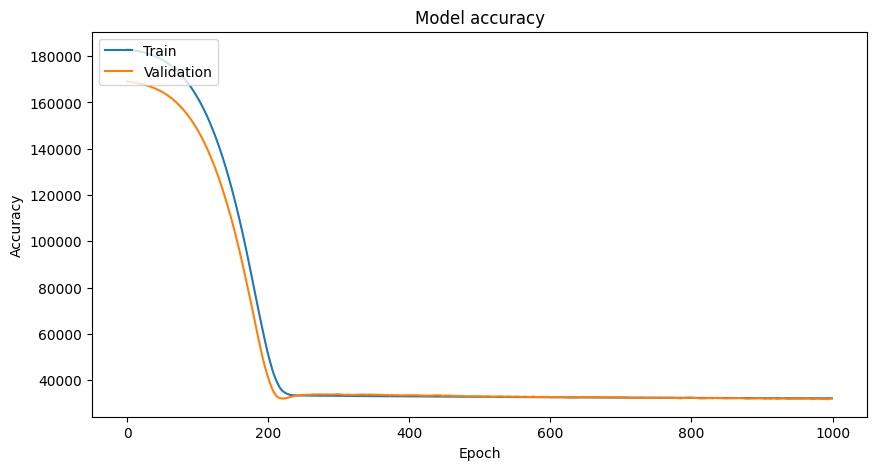

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure
plt.figure(figsize=(10,5))

# Plot training accuracy
plt.plot(history_model_1.history['mae'])
# Plot validation accuracy
plt.plot(history_model_1.history['val_mae'])

# Set title and labels
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show the plot
plt.show()


#Checking on which epoch the model achieves its lowest validation_loss

In [15]:
import numpy as np

# Get the list of validation losses
val_losses = history_model_1.history['val_loss']

# Find the epoch with the lowest validation loss
min_loss_epoch = np.argmin(val_losses)

print("The epoch with the lowest validation loss is epoch", min_loss_epoch + 1)


The epoch with the lowest validation loss is epoch 993


In [16]:
model_1_train_performance = model_1.evaluate(x_train,y_train)[0]

29/29 [==============================] - 0s 3ms/step - loss: 32157.0117 - mae: 32157.0117


In [17]:
model_1_test_performance = model_1.evaluate(x_test,y_test)[0]

4/4 [==============================] - 0s 4ms/step - loss: 32013.4277 - mae: 32013.4277


#Creating the second model however this time using the scaled data 0-1

Using the linear activation to check how the model will behave

In [18]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation = "linear"),
    tf.keras.layers.Dense(100, activation = "linear"),
    tf.keras.layers.Dense(100, activation = "linear"),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['mae'])

history_model_2 = model_2.fit(x_train_scaled,y_train, epochs = 100, verbose = 0, validation_data = (x_test_scaled, y_test))

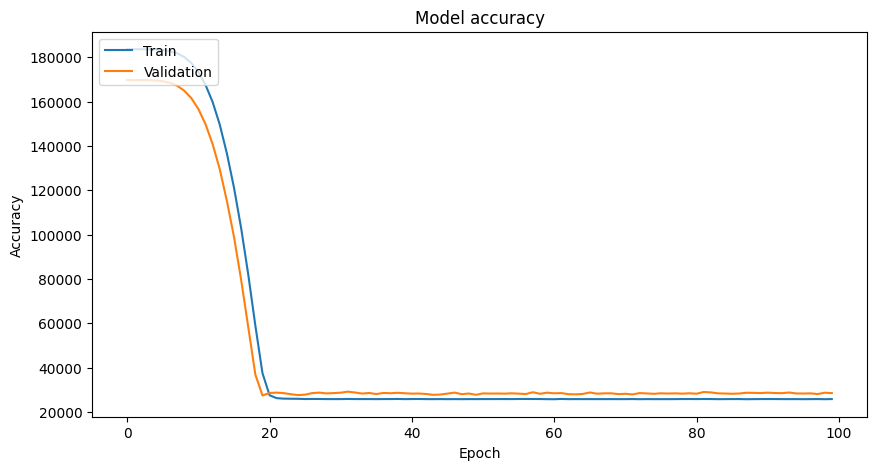

In [19]:
# Create a figure
plt.figure(figsize=(10,5))

# Plot training accuracy
plt.plot(history_model_2.history['mae'])
# Plot validation accuracy
plt.plot(history_model_2.history['val_mae'])

# Set title and labels
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show the plot
plt.show()


#Evaluating the models performance on training and test data

In [20]:
# Get the list of validation losses
val_losses = history_model_2.history['val_loss']

# Find the epoch with the lowest validation loss
min_loss_epoch = np.argmin(val_losses)

print("The epoch with the lowest validation loss is epoch", min_loss_epoch + 1)

The epoch with the lowest validation loss is epoch 20


In [21]:
model_2_test_performance = model_2.evaluate(x_test_scaled,y_test)[0]

4/4 [==============================] - 0s 4ms/step - loss: 28548.1875 - mae: 28548.1875


In [22]:
model_2_train_performance = model_2.evaluate(x_train_scaled,y_train)[0]

29/29 [==============================] - 0s 3ms/step - loss: 25756.2070 - mae: 25756.2070


#Creating a third model to check the performance for relu activation and a different network structure

In [23]:
import numpy as np
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

history_model_3 = model_3.fit(x_train_scaled, y_train, verbose =0, epochs = 250,validation_data = (x_test_scaled,y_test))


In [24]:
model_3_test_performance = model_3.evaluate(x_test_scaled,y_test)[0]

4/4 [==============================] - 0s 6ms/step - loss: 28310.1094 - mae: 28310.1094


In [25]:
model_3_train_performance = model_3.evaluate(x_train_scaled,y_train)[0]

29/29 [==============================] - 0s 4ms/step - loss: 23905.6660 - mae: 23905.6660


In [26]:
# Get the list of validation losses
val_losses = history_model_3.history['val_loss']

# Find the epoch with the lowest validation loss
min_loss_epoch = np.argmin(val_losses)

print("The epoch with the lowest validation loss is epoch", min_loss_epoch + 1)

The epoch with the lowest validation loss is epoch 250


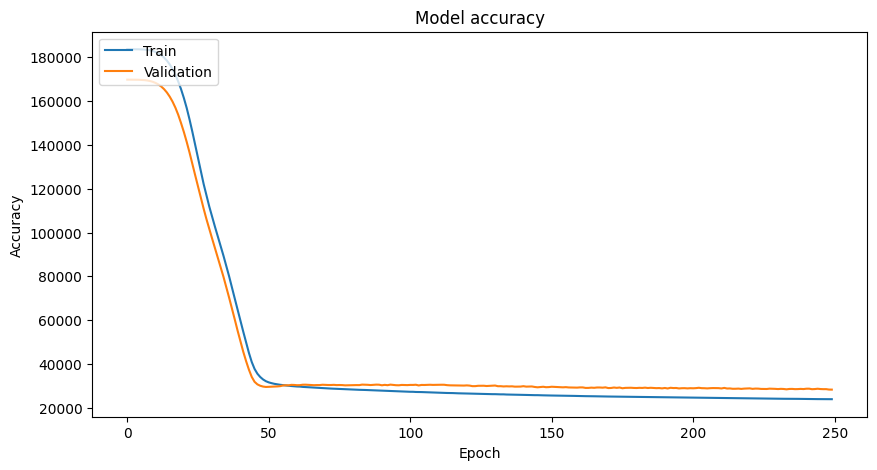

In [27]:
# Create a figure
plt.figure(figsize=(10,5))

# Plot training accuracy
plt.plot(history_model_3.history['mae'])
# Plot validation accuracy
plt.plot(history_model_3.history['val_mae'])

# Set title and labels
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show the plot
plt.show()


#Implementing a stop once the model does not improve more than 55 in 10 epochs and a changing learning rate





In [28]:
from tensorflow.keras.callbacks import EarlyStopping

from keras.callbacks import LearningRateScheduler
import math

def step_decay(epoch):
    initial_lrate = 0.05
    drop = 0.5
    epochs_drop = 30.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(step_decay)

# Create early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta= 10)



import numpy as np
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Use Adam optimizer, which is generally a good starting point
model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])



history_model_4 = model_4.fit(x_train_scaled, y_train, verbose =0, epochs = 250,validation_data = (x_test_scaled,y_test), callbacks = [lrate])

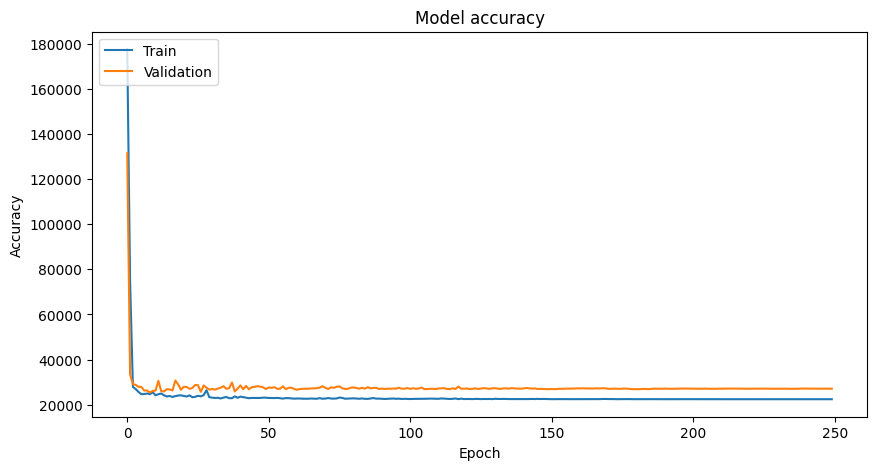

In [29]:
# Create a figure
plt.figure(figsize=(10,5))

# Plot training accuracy
plt.plot(history_model_4.history['mae'])
# Plot validation accuracy
plt.plot(history_model_4.history['val_mae'])

# Set title and labels
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show the plot
plt.show()


In [30]:
model_4_train_performance = model_4.evaluate(x_train_scaled,y_train)[0]
model_4_train_performance

29/29 [==============================] - 0s 2ms/step - loss: 22400.5098 - mae: 22400.5098


22400.509765625

In [31]:
model_4_test_performance = model_4.evaluate(x_test_scaled,y_test)[0]
model_4_test_performance

4/4 [==============================] - 0s 4ms/step - loss: 27043.3008 - mae: 27043.3008


27043.30078125

In [32]:
# Get the list of validation losses
val_losses = history_model_4.history['val_loss']

# Find the epoch with the lowest validation loss
min_loss_epoch = np.argmin(val_losses)

print("The epoch with the lowest validation loss is epoch", min_loss_epoch + 1)




The epoch with the lowest validation loss is epoch 9


## Since the validation loss is the lowest at the last epoch It is safe to assume that the validation_loss was slowly going down, thus this justifies the lengthy period of training after the training_loss became way lower than the validation loss


In [33]:
training_losses = [model_1_train_performance,model_2_train_performance,model_3_train_performance,model_4_train_performance]

lowest_train_loss = np.argmin(training_losses)
print(f"The lowest train loss was exhibited by the model {lowest_train_loss+1} and it was equal to {training_losses[lowest_train_loss]}")

The lowest train loss was exhibited by the model 4 and it was equal to 22400.509765625


In [34]:
test_losses = [model_1_test_performance,model_2_test_performance,model_3_test_performance,model_4_test_performance]

lowest_test_loss = np.argmin(test_losses)
print(f"The lowest test loss was exhibited by the model {lowest_test_loss+1} and it was equal to {test_losses[lowest_test_loss]}")

The lowest test loss was exhibited by the model 4 and it was equal to 27043.30078125


In [35]:
i = 0
delta_losses = [model_4_train_performance]
for training_loss in training_losses:
  delta_losses[i] = training_loss - test_losses[i]
lowest_delta = np.argmin(delta_losses)
print(f"the lowest difference in losses between training and testing is present in model {lowest_delta+1} and it is equal to {delta_losses[lowest_delta]}")


the lowest difference in losses between training and testing is present in model 1 and it is equal to -9612.91796875


In [36]:
test = pd.read_csv("test.csv")
test = pd.get_dummies(test.drop("Id", axis =1))


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(x_train)


In [38]:
predictions = model_3.predict(test_data_scaled)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predicted_price'])

test_data_with_predictions = test.copy()
test_data_with_predictions['Predicted_price'] = predictions_df

# Save the combined DataFrame as a CSV file
test_data_with_predictions.to_csv('/content/test_data_with_predictions.csv', index=False)


29/29 [==============================] - 0s 2ms/step


In [39]:
above_threshold = (test_data_with_predictions['Predicted_price'] > 250000).sum()
print(f"Number of predicted prices above 250,000: {above_threshold}")


Number of predicted prices above 250,000: 36


In [40]:
above_250 = test_data_with_predictions[(test_data_with_predictions["Predicted_price"]>250000)]

# Checking how many have garage area >700
Garage_above_700 = (above_250["GarageArea"]>700).sum()
print(f"There are {Garage_above_700} houses costing 250,000 and above with a garage area above 700")

There are 1 houses costing 250,000 and above with a garage area above 700


In [41]:
# Checking how many have GrLivArea area >2000
GrLivArea_above_2000= (above_250["GrLivArea"]>2000).sum()
print(f"There are {GrLivArea_above_2000} houses costing 250,000 and above with a General living area above 2000")

There are 4 houses costing 250,000 and above with a General living area above 2000


In [42]:
# Checking how many have OverallQual area >8
OverallQual_above_8 = (above_250["OverallQual"]>8).sum()
print(f"There are {OverallQual_above_8} houses costing 250,000 and above with a overall quality above 8")

There are 0 houses costing 250,000 and above with a overall quality above 8


#Building a extra model using a different loss function



In [44]:

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compiling the model with a different loss function - Mean Squared Error
model_5.compile(loss = tf.keras.losses.MeanSquaredError(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# Fitting the model
history_model_5 = model_5.fit(x_train_scaled, y_train, verbose =0, epochs = 250,validation_data = (x_test_scaled,y_test))


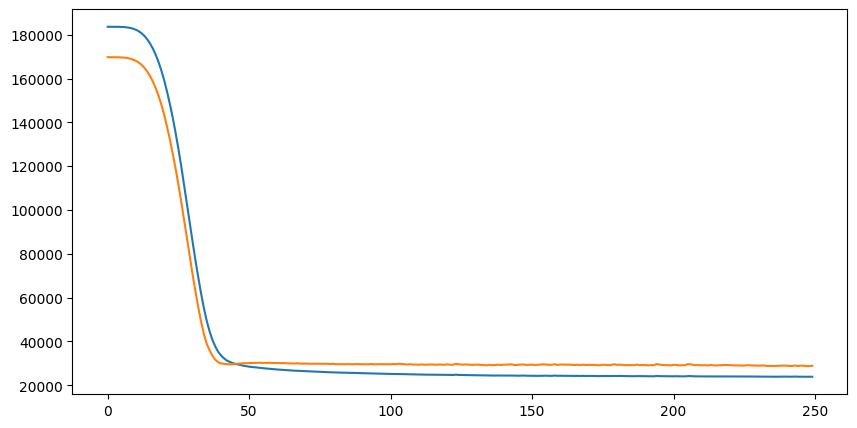

In [45]:
# Create a figure
plt.figure(figsize=(10,5))

# Plot training accuracy
plt.plot(history_model_5.history['mae'])
# Plot validation accuracy
plt.plot(history_model_5.history['val_mae'])

# Set title and labels2Validation'], loc='upper left')

# Show the plot
plt.show()